In [2]:
import matplotlib.pyplot as plt
from scipy.linalg import expm
import networkx as nx
import numpy as np

In [3]:
G = nx.karate_club_graph()

In [4]:
n = len(G.nodes())

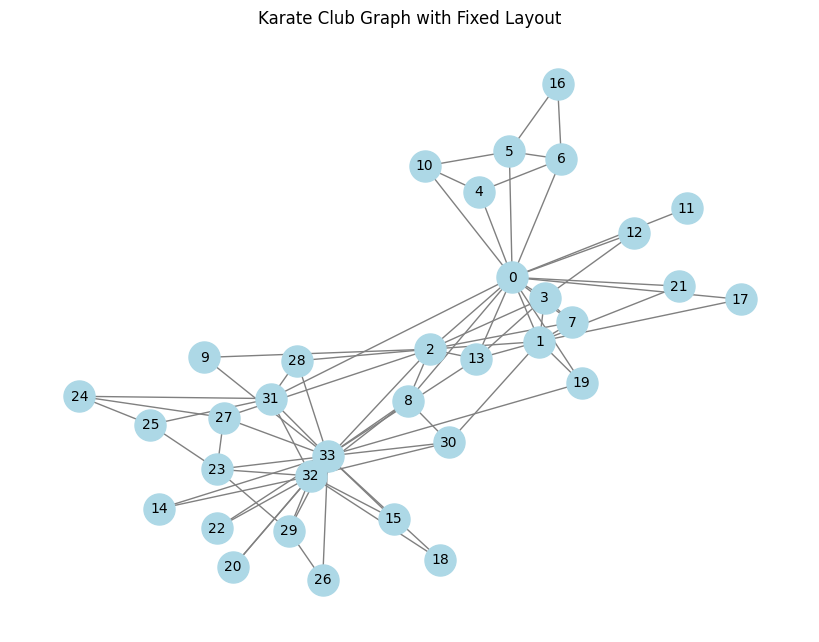

In [5]:
pos = nx.spring_layout(G, seed=3)

plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)

# Show the plot
plt.title("Karate Club Graph with Fixed Layout")
plt.show()

In [6]:
A = nx.to_numpy_array(G)
E = expm(A)

diag_E = np.diag(E)
E_i = np.repeat(diag_E[:, np.newaxis], E.shape[0], axis=1)
E_j = np.repeat(diag_E[np.newaxis, :], E.shape[1], axis=0)

Z = E / np.sqrt(E_i * E_j)

D = 2 - 2 * Z

In [7]:
closeness_centrality = np.zeros(n)

# Compute closeness centrality for each node
for v in range(n):
    sum_Dvw = np.sum(D[v, :])  # Sum of distances from v to all other nodes
    closeness_centrality[v] = round(1 / sum_Dvw, 7)  # Communicability Cosine centrality

print("Communicability Cosine Centrality:", closeness_centrality)

Communicability Cosine Centrality: [1.1958051 1.1499787 1.4982044 1.0247177 0.8415438 0.7664233 0.7732059
 1.0174795 1.9163175 1.6426682 0.7859402 0.9507288 0.8367022 1.4763772
 0.9169061 0.9287952 0.5472834 0.9356181 0.9353069 1.4690098 0.9063311
 0.92791   0.9307557 0.8471462 0.8705317 0.7846461 0.7862534 1.2424632
 1.7487414 0.8123272 1.5750782 1.1430901 1.1046472 1.1718419]


In [8]:
centrality_diff_matrix = np.exp(np.abs(closeness_centrality[:, np.newaxis] - closeness_centrality))

In [9]:
S = D * centrality_diff_matrix

In [11]:
S

array([[0.00000000e+00, 3.48878465e-05, 1.22098904e-03, ...,
        4.35388904e-02, 4.71329476e-02, 4.10257125e-02],
       [3.48878465e-05, 0.00000000e+00, 1.70341073e-03, ...,
        4.35692984e-02, 4.71087944e-02, 4.29073304e-02],
       [1.22098904e-03, 1.70341073e-03, 0.00000000e+00, ...,
        4.29364660e-02, 4.67886772e-02, 4.02246156e-02],
       ...,
       [4.35388904e-02, 4.35692984e-02, 4.29364660e-02, ...,
        0.00000000e+00, 2.93787625e-05, 2.07994281e-05],
       [4.71329476e-02, 4.71087944e-02, 4.67886772e-02, ...,
        2.93787625e-05, 0.00000000e+00, 5.75407318e-05],
       [4.10257125e-02, 4.29073304e-02, 4.02246156e-02, ...,
        2.07994281e-05, 5.75407318e-05, 0.00000000e+00]])

In [12]:
max_value = np.max(S)
max_index = np.unravel_index(np.argmax(S), S.shape)

In [13]:
u, v = np.unravel_index(np.argmax(S), S.shape)

In [14]:
sorted_indices = np.argsort(S)[::-1]

In [15]:
matrix = np.array([[1, 5, 3], 
                   [4, 8, 6], 
                   [7, 2, 9]])

# Step 1: Flatten the matrix
flat_matrix = matrix.flatten()

# Step 2: Get the indices of the sorted array in descending order
sorted_indices = np.argsort(flat_matrix)[::-1]

# Step 3: Get the indices of the second and third largest values
second_largest_index = np.unravel_index(sorted_indices[1], matrix.shape)
third_largest_index = np.unravel_index(sorted_indices[2], matrix.shape)

print("Second largest value index:", second_largest_index)
print("Third largest value index:", third_largest_index)

Second largest value index: (1, 1)
Third largest value index: (2, 0)


In [16]:
from main import merge_nodes_undirected

In [17]:
H = merge_nodes_undirected(G, 0, 1, "0 1")

In [18]:
def coarsenet(G, S, alpha):
    n = len(G.nodes())
    i = n

    flat_matrix = S.flatten()
    sorted_indices = np.argsort(flat_matrix)

    H = G.copy()

    while i <= (2 * alpha + 1) * n:

        u, v = np.unravel_index(sorted_indices[i], S.shape)
        a, b = D[u][v], centrality_diff_matrix[u][v]
        i += 2

        for node in H.nodes():
            if isinstance(node, str):
                split = node.split('+')
                if str(u) in split:
                    u = node
                if str(v) in split:
                    v = node
        
        print(u, v, a, b)

        if not isinstance(u, str) or not isinstance(v, str) or u != v:
            H = merge_nodes_undirected(H, u, v, str(u) + '+' + str(v))
    
    return H

In [19]:
H = coarsenet(G, S, alpha=0.25)

15 22 1.5516029128193054e-07 1.001962423036624
18 15+22 5.813672350196697e-07 1.004561572440434
3 7 8.969531097857697e-07 1.0072644590875621
18+15+22 18+15+22 9.393156048531637e-07 1.0065329472118982
6 5 1.4728180710577021e-06 1.0068056539237542
20 14 2.2321181729623163e-06 1.0106311129361676
18+15+22 20+14 2.6478912844574154e-06 1.011960056272655
17 21 2.7845306111995427e-06 1.007737883879331
19 13 2.991516324435395e-06 1.0073946060629897


In [21]:
H.nodes()

NodeView((0, 1, 2, 4, 8, 9, 10, 11, 12, 16, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, '3+7', '6+5', '18+15+22+20+14', '17+21', '19+13'))

In [22]:
adjacency_matrix = nx.to_numpy_array(G)
eigenvalues = np.linalg.eigvals(adjacency_matrix)
sorted_eigenvalues = np.sort(eigenvalues)[::-1]

# Calculate Spectral Ratio: Largest eigenvalue / second-largest eigenvalue
spectral_ratio = sorted_eigenvalues[0] / sorted_eigenvalues[1]

# Calculate Eigenratio: Largest eigenvalue / smallest non-zero eigenvalue
non_zero_eigenvalues = sorted_eigenvalues[sorted_eigenvalues != 0]
eigenratio = sorted_eigenvalues[0] / non_zero_eigenvalues[-1]

# Calculate Spectral Gap: Difference between largest and second-largest eigenvalues
spectral_gap = sorted_eigenvalues[0] - sorted_eigenvalues[1]

print("Spectral Ratio of G:", spectral_ratio)
print("Eigenratio of G:", eigenratio)
print("Spectral Gap of G:", spectral_gap)

print()

adjacency_matrix = nx.to_numpy_array(H)
eigenvalues = np.linalg.eigvals(adjacency_matrix)
sorted_eigenvalues = np.sort(eigenvalues)[::-1]

# Calculate Spectral Ratio: Largest eigenvalue / second-largest eigenvalue
spectral_ratio = sorted_eigenvalues[0] / sorted_eigenvalues[1]

# Calculate Eigenratio: Largest eigenvalue / smallest non-zero eigenvalue
non_zero_eigenvalues = sorted_eigenvalues[sorted_eigenvalues != 0]
eigenratio = sorted_eigenvalues[0] / non_zero_eigenvalues[-1]

# Calculate Spectral Gap: Difference between largest and second-largest eigenvalues
spectral_gap = sorted_eigenvalues[0] - sorted_eigenvalues[1]

print("Spectral Ratio of H:", spectral_ratio)
print("Eigenratio of H:", eigenratio)
print("Spectral Gap of H:", spectral_gap)

Spectral Ratio of G: (1.2678101310997651+0j)
Eigenratio of G: (-1.6251559999585727-0j)
Spectral Gap of G: (4.581245823406128+0j)

Spectral Ratio of H: 1.5529202897810335
Eigenratio of H: -1.5623581571742113
Spectral Gap of H: 6.692830257409531
